In [31]:
import matplotlib.pyplot as plt
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv("/content/original data.csv")
df.head()

,Unnamed: 0,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label,feature2
0,0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g,0
1,1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b,0
2,2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g,0
3,3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b,0
4,4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g,0


In [11]:
df.describe()

,Unnamed: 0,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature2
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.0
mean,175.000000,0.891738,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.0
std,101.469207,0.311155,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.0
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
25%,87.500000,1.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.0
50%,175.000000,1.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,0.0
75%,262.500000,1.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,0.0
max,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


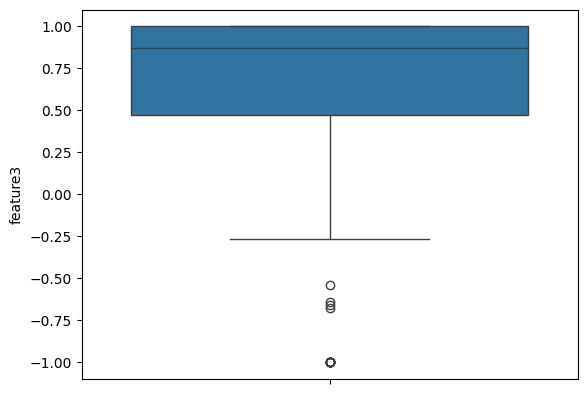

In [34]:
sns.boxplot(df['feature3'])
plt.show()

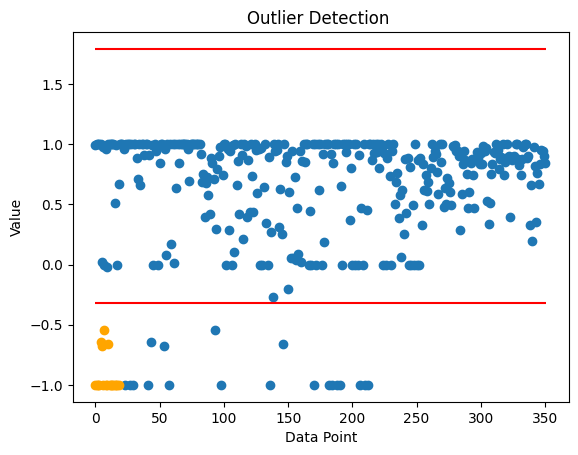

In [40]:

data = df['feature3']
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

plt.scatter(np.arange(len(data)), data)


plt.hlines(y=[lower_bound, upper_bound], xmin=0, xmax=len(data), color='red')


outliers = data[(data < lower_bound) | (data > upper_bound)]
plt.scatter(np.arange(len(outliers)), outliers, color='orange')


plt.title('Outlier Detection ')
plt.xlabel('Data Point')
plt.ylabel('Value')

plt.show()

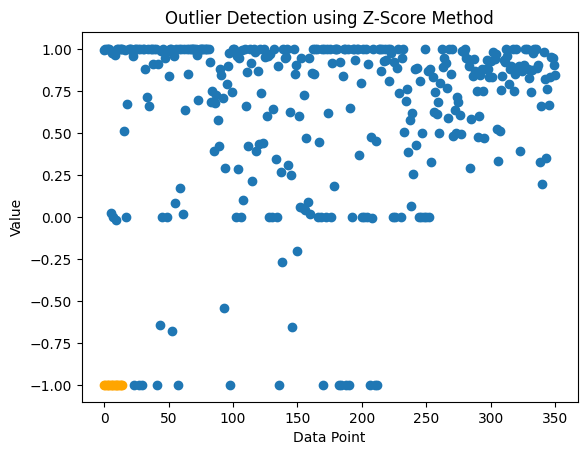

In [41]:
data = df['feature3']
mean = np.mean(data)
std = np.std(data)


z_scores = (data - mean) / std
threshold = 3


plt.scatter(np.arange(len(data)), data)

outliers = data[np.abs(z_scores) > threshold]
plt.scatter(np.arange(len(outliers)), outliers, color='orange')

plt.title('Outlier Detection using Z-Score Method')
plt.xlabel('Data Point')
plt.ylabel('Value')


plt.show()